In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_2018_eda.log"), # Actualizado
        logging.StreamHandler()
    ]
)

logging.info("Inicio del notebook de EDA (001_2018_eda.ipynb).") # Actualizado

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2025-05-21 23:25:43,101 - INFO - Inicio del notebook de EDA (001_2018_eda.ipynb).


In [2]:
# --- Definición de la ruta al archivo ---
file_path = "/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/raw/2018.csv" # Actualizado

logging.info(f"Ruta del archivo a cargar: {file_path}")

df_2018 = None # Actualizado

try:
    logging.info(f"Intentando cargar el archivo CSV: {os.path.basename(file_path)}")
    df_2018 = pd.read_csv(file_path) 
    logging.info(f"Archivo {os.path.basename(file_path)} cargado exitosamente.")
    logging.info(f"El DataFrame tiene {df_2018.shape[0]} filas y {df_2018.shape[1]} columnas.") # Actualizado

except FileNotFoundError:
    logging.error(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except pd.errors.EmptyDataError:
    logging.error(f"Error: El archivo {os.path.basename(file_path)} está vacío.")
except pd.errors.ParserError:
    logging.error(f"Error: No se pudo parsear el archivo {os.path.basename(file_path)}. Verifica el formato del CSV.")
except Exception as e:
    logging.error(f"Ocurrió un error inesperado al cargar {os.path.basename(file_path)}: {e}")

2025-05-21 23:25:43,108 - INFO - Ruta del archivo a cargar: /home/nicolas/Escritorio/workshops_ETL/workshop_3/data/raw/2018.csv
2025-05-21 23:25:43,109 - INFO - Intentando cargar el archivo CSV: 2018.csv
2025-05-21 23:25:43,111 - INFO - Archivo 2018.csv cargado exitosamente.
2025-05-21 23:25:43,112 - INFO - El DataFrame tiene 156 filas y 9 columnas.


In [3]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2018' in locals() and df_2018 is not None: # Actualizado
    logging.info("Mostrando las primeras 5 filas del DataFrame df_2018 en formato Markdown.")
    print("\nPrimeras 5 filas del DataFrame df_2018 (Markdown):")
    print(df_2018.head().to_markdown(index=False)) # Actualizado
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,140 - INFO - Mostrando las primeras 5 filas del DataFrame df_2018 en formato Markdown.



Primeras 5 filas del DataFrame df_2018 (Markdown):
|   Overall rank | Country or region   |   Score |   GDP per capita |   Social support |   Healthy life expectancy |   Freedom to make life choices |   Generosity |   Perceptions of corruption |
|---------------:|:--------------------|--------:|-----------------:|-----------------:|--------------------------:|-------------------------------:|-------------:|----------------------------:|
|              1 | Finland             |   7.632 |            1.305 |            1.592 |                     0.874 |                          0.681 |        0.202 |                       0.393 |
|              2 | Norway              |   7.594 |            1.456 |            1.582 |                     0.861 |                          0.686 |        0.286 |                       0.34  |
|              3 | Denmark             |   7.555 |            1.351 |            1.59  |                     0.868 |                          0.683 |        0.284 |    

In [4]:
# --- Obtener y mostrar la lista de columnas (df_2018) ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Obteniendo la lista de todas las columnas del DataFrame df_2018.")
    column_list_2018 = df_2018.columns.tolist()

    print("\nLista de columnas (df_2018):")
    for i, col in enumerate(column_list_2018):
        print(f"{i+1}. {col}")
    logging.info(f"El DataFrame df_2018 tiene {len(column_list_2018)} columnas.")
    logging.info(f"Nombres de las columnas (df_2018): {column_list_2018}")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,151 - INFO - Obteniendo la lista de todas las columnas del DataFrame df_2018.
2025-05-21 23:25:43,152 - INFO - El DataFrame df_2018 tiene 9 columnas.
2025-05-21 23:25:43,152 - INFO - Nombres de las columnas (df_2018): ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']



Lista de columnas (df_2018):
1. Overall rank
2. Country or region
3. Score
4. GDP per capita
5. Social support
6. Healthy life expectancy
7. Freedom to make life choices
8. Generosity
9. Perceptions of corruption


In [5]:
# --- Mostrar la lista de todos los países presentes en df_2018 ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Obteniendo la lista de todos los países en df_2018.")
    countries = df_2018['Country or region'].unique().tolist()
    print(f"Total de países: {len(countries)}")
    print(countries)
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,159 - INFO - Obteniendo la lista de todos los países en df_2018.


Total de países: 156
['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia', 'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany', 'Belgium', 'Luxembourg', 'United States', 'Israel', 'United Arab Emirates', 'Czech Republic', 'Malta', 'France', 'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina', 'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore', 'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia', 'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan', 'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania', 'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica', 'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus', 'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova', 'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras', 'Belarus', 'Turkey', 'Pakistan', 'Hong Kong', 'Portugal', 'Serbia', 'Greece', 'Lebanon', 'Montenegro'

In [6]:
# --- Verificar si el DataFrame df_2018 tiene filas duplicadas ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Verificando la existencia de filas duplicadas en df_2018.")
    num_duplicated_rows_2018 = df_2018.duplicated().sum()

    if num_duplicated_rows_2018 > 0:
        logging.info(f"Se encontraron {num_duplicated_rows_2018} fila(s) duplicada(s) en df_2018.")
        print(f"\nEl DataFrame df_2018 contiene {num_duplicated_rows_2018} fila(s) duplicada(s).")
    else:
        logging.info("No se encontraron filas duplicadas en el DataFrame df_2018.")
        print("\nNo hay filas duplicadas en el DataFrame df_2018.")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,168 - INFO - Verificando la existencia de filas duplicadas en df_2018.
2025-05-21 23:25:43,171 - INFO - No se encontraron filas duplicadas en el DataFrame df_2018.



No hay filas duplicadas en el DataFrame df_2018.


In [7]:
# --- Mostrar información general del DataFrame df_2018 (.info()) ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Mostrando información del DataFrame df_2018 (conteo de no nulos y tipos de datos).")
    print("\nInformación del DataFrame (df_2018):")
    df_2018.info()

    print("\nConteo de valores nulos por columna (df_2018):")
    null_counts_2018 = df_2018.isnull().sum()
    print(null_counts_2018[null_counts_2018 > 0].to_markdown() if null_counts_2018.sum() > 0 else "No hay valores nulos explícitos (NaN).")
    if null_counts_2018.sum() > 0:
        logging.info(f"Columnas con valores nulos y sus conteos (df_2018): {null_counts_2018[null_counts_2018 > 0].to_dict()}")
    else:
        logging.info("No se encontraron valores nulos explícitos (NaN) en el DataFrame df_2018.")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,178 - INFO - Mostrando información del DataFrame df_2018 (conteo de no nulos y tipos de datos).
2025-05-21 23:25:43,186 - INFO - Columnas con valores nulos y sus conteos (df_2018): {'Perceptions of corruption': 1}



Información del DataFrame (df_2018):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB

Conteo de valores nulos por columna (df_2018):
|                           |   0 |
|:--------------------------|----:|
| Perceptions of corruptio

In [8]:
# --- Calcular y mostrar estadísticas descriptivas para columnas numéricas de df_2018 ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas numéricas de df_2018.")
    descriptive_stats_numeric_2018 = df_2018.describe()
    print("\nEstadísticas Descriptivas de las Columnas Numéricas (df_2018):")
    print(descriptive_stats_numeric_2018.to_markdown())
    logging.info("Estadísticas descriptivas numéricas de df_2018 calculadas y mostradas.")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,201 - INFO - Calculando estadísticas descriptivas para las columnas numéricas de df_2018.
2025-05-21 23:25:43,214 - INFO - Estadísticas descriptivas numéricas de df_2018 calculadas y mostradas.



Estadísticas Descriptivas de las Columnas Numéricas (df_2018):
|       |   Overall rank |     Score |   GDP per capita |   Social support |   Healthy life expectancy |   Freedom to make life choices |   Generosity |   Perceptions of corruption |
|:------|---------------:|----------:|-----------------:|-----------------:|--------------------------:|-------------------------------:|-------------:|----------------------------:|
| count |       156      | 156       |       156        |       156        |                156        |                     156        |  156         |                 155         |
| mean  |        78.5    |   5.37592 |         0.891449 |         1.21324  |                  0.597346 |                       0.454506 |    0.181006  |                   0.112     |
| std   |        45.1774 |   1.11951 |         0.391921 |         0.302372 |                  0.247579 |                       0.162424 |    0.0984706 |                   0.0964918 |
| min   |         1  

In [9]:
# --- Calcular y mostrar estadísticas descriptivas para columnas de tipo 'object' de df_2018 ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas de tipo 'object' de df_2018.")
    object_columns_2018 = df_2018.select_dtypes(include=['object']).columns

    if not object_columns_2018.empty:
        descriptive_stats_object_2018 = df_2018[object_columns_2018].describe()
        print("\nEstadísticas Descriptivas de las Columnas de Tipo 'Object' (df_2018):")
        print(descriptive_stats_object_2018.to_markdown())
        logging.info("Estadísticas descriptivas para columnas 'object' de df_2018 calculadas y mostradas.")
    else:
        logging.info("No se encontraron columnas de tipo 'object' en el DataFrame df_2018.")
        print("\nNo hay columnas de tipo 'object' para analizar en df_2018.")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,222 - INFO - Calculando estadísticas descriptivas para las columnas de tipo 'object' de df_2018.
2025-05-21 23:25:43,225 - INFO - Estadísticas descriptivas para columnas 'object' de df_2018 calculadas y mostradas.



Estadísticas Descriptivas de las Columnas de Tipo 'Object' (df_2018):
|        | Country or region   |
|:-------|:--------------------|
| count  | 156                 |
| unique | 156                 |
| top    | Finland             |
| freq   | 1                   |


2025-05-21 23:25:43,236 - INFO - Iniciando el cálculo de la correlación gráfica para df_2018.
2025-05-21 23:25:43,237 - INFO - Columnas numéricas identificadas en df_2018: ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2025-05-21 23:25:43,238 - INFO - Columnas a excluir del heatmap de correlación de features (df_2018): ['Overall rank']
2025-05-21 23:25:43,238 - INFO - Columnas seleccionadas para el heatmap de correlación de features (df_2018): ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2025-05-21 23:25:43,239 - INFO - Matriz de correlación de features calculada para df_2018.


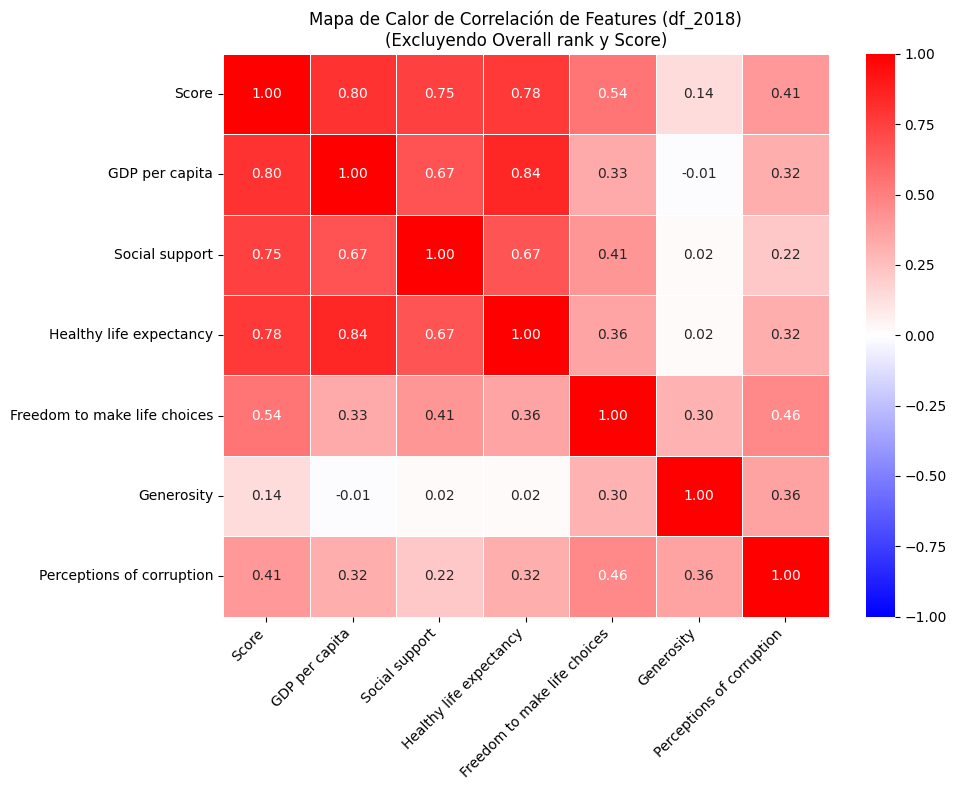

2025-05-21 23:25:43,500 - INFO - Mapa de calor de correlación de features generado y mostrado para df_2018.
2025-05-21 23:25:43,503 - INFO - Correlación de features con 'Score' (df_2018) calculada y mostrada.



Correlación de features con 'Score' (df_2018):
|                              |    Score |
|:-----------------------------|---------:|
| GDP per capita               | 0.802124 |
| Healthy life expectancy      | 0.775814 |
| Social support               | 0.74576  |
| Freedom to make life choices | 0.54428  |
| Perceptions of corruption    | 0.405292 |
| Generosity                   | 0.135825 |


In [10]:
# --- Generar y visualizar la matriz de correlación (Heatmap) para df_2018 ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Iniciando el cálculo de la correlación gráfica para df_2018.")

    numeric_cols_2018 = df_2018.select_dtypes(include=np.number).columns.tolist()
    logging.info(f"Columnas numéricas identificadas en df_2018: {numeric_cols_2018}")

    # Columnas a excluir del análisis de correlación de *features*
    # Para 2018, los nombres son diferentes.
    cols_to_exclude_heatmap_2018 = [
        'Overall rank',
        ]
    actual_cols_to_exclude_2018 = [col for col in cols_to_exclude_heatmap_2018 if col in numeric_cols_2018]
    logging.info(f"Columnas a excluir del heatmap de correlación de features (df_2018): {actual_cols_to_exclude_2018}")

    cols_for_correlation_2018 = [col for col in numeric_cols_2018 if col not in actual_cols_to_exclude_2018]

    if not cols_for_correlation_2018:
        logging.warning("No quedan columnas numéricas para el análisis de correlación de features después de la exclusión en df_2018.")
        print("\nNo hay columnas numéricas suficientes para el heatmap de correlación de features en df_2018.")
    else:
        logging.info(f"Columnas seleccionadas para el heatmap de correlación de features (df_2018): {cols_for_correlation_2018}")
        df_correlation_subset_2018 = df_2018[cols_for_correlation_2018]
        correlation_matrix_2018 = df_correlation_subset_2018.corr()
        logging.info("Matriz de correlación de features calculada para df_2018.")

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix_2018, annot=True, cmap='bwr', fmt=".2f", linewidths=.5, vmin=-1, vmax=1, center=0)
        plt.title('Mapa de Calor de Correlación de Features (df_2018)\n(Excluyendo Overall rank y Score)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        logging.info("Mapa de calor de correlación de features generado y mostrado para df_2018.")

    # Opcional: Mostrar correlación con 'Score' por separado
    if 'Score' in numeric_cols_2018 and cols_for_correlation_2018:
        print("\nCorrelación de features con 'Score' (df_2018):")
        cols_for_target_correlation_2018 = cols_for_correlation_2018 + ['Score']
        cols_for_target_correlation_2018 = list(dict.fromkeys(cols_for_target_correlation_2018))

        if 'Score' in cols_for_target_correlation_2018:
            correlation_with_score_2018 = df_2018[cols_for_target_correlation_2018].corr()['Score'].drop('Score').sort_values(ascending=False)
            print(correlation_with_score_2018.to_markdown())
            logging.info("Correlación de features con 'Score' (df_2018) calculada y mostrada.")
        else:
            logging.warning("'Score' no está en las columnas para correlación con el target (df_2018).")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:43,512 - INFO - Generando matriz de histogramas/KDE para variables numéricas clave de df_2018 usando paleta 'viridis'.


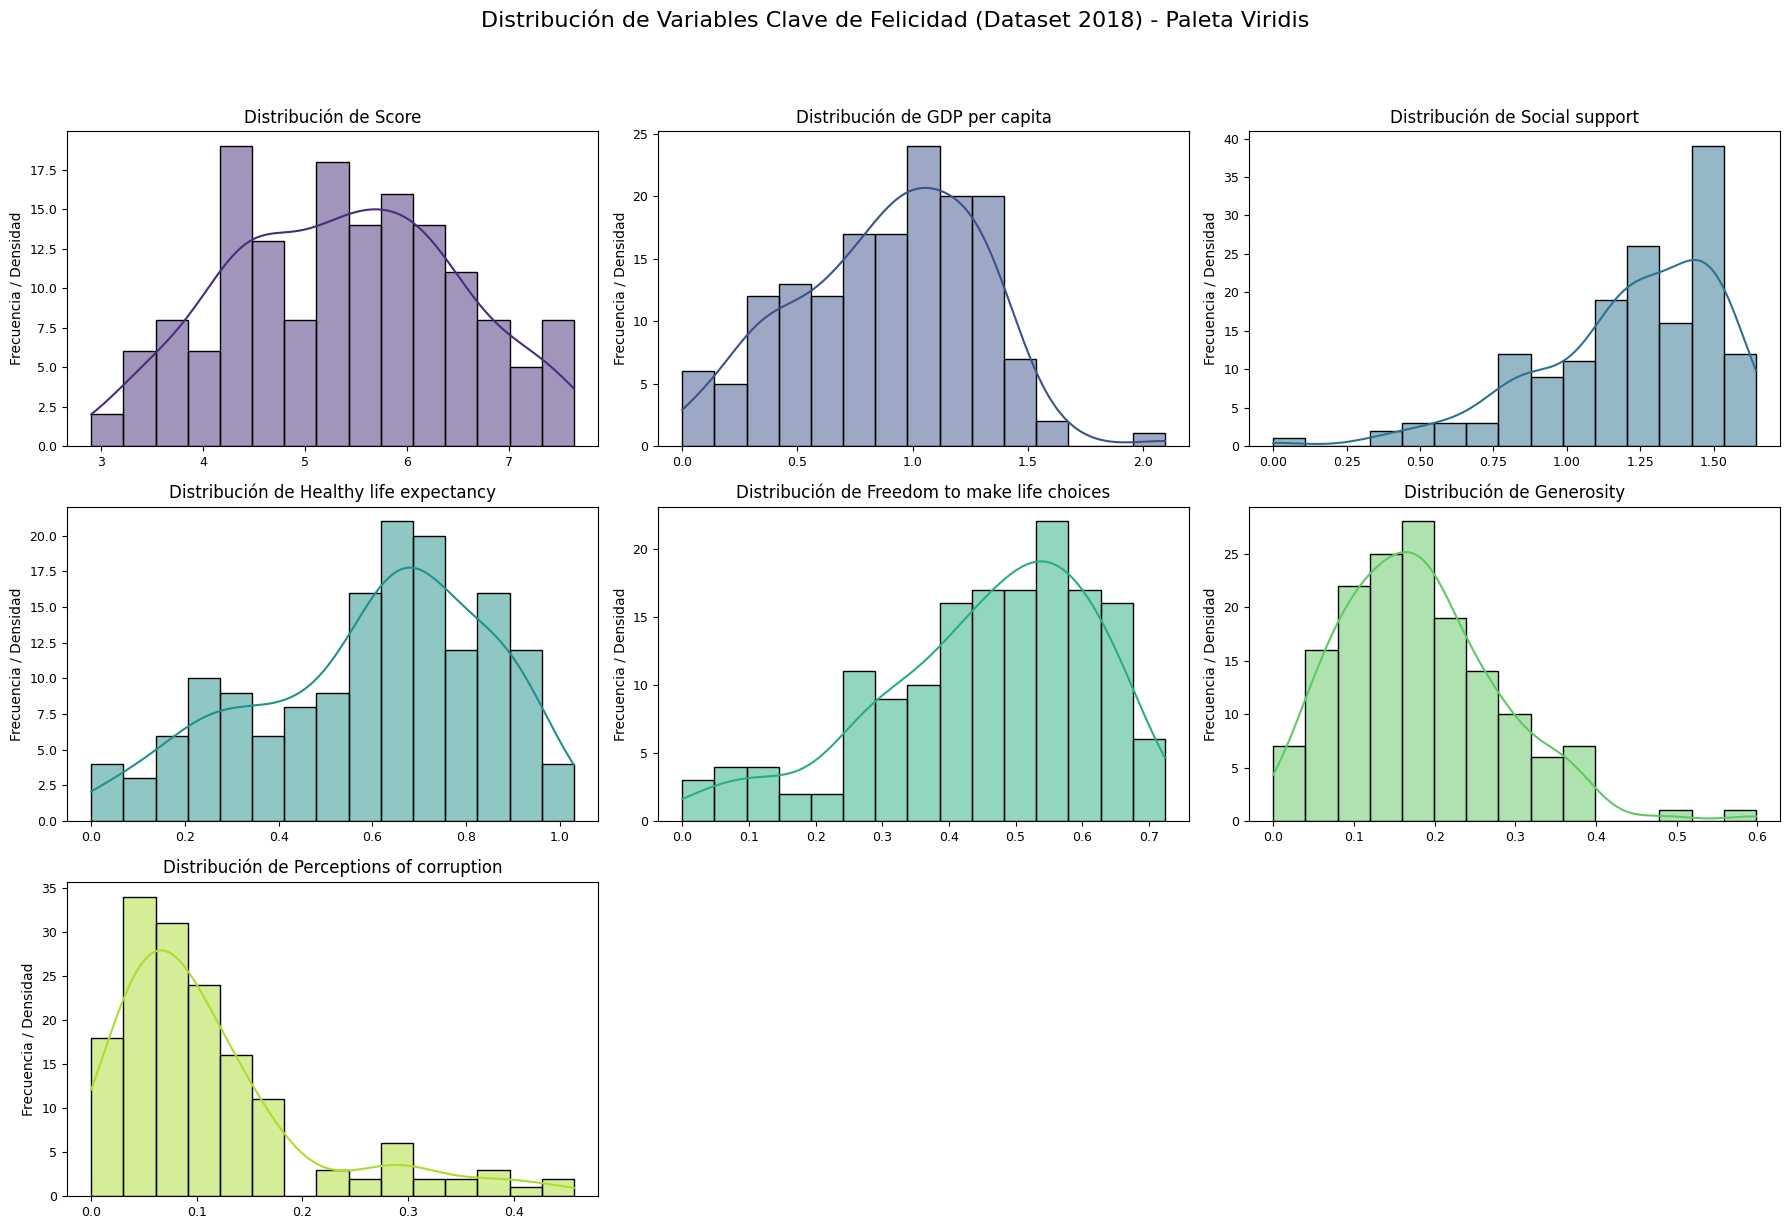

2025-05-21 23:25:44,757 - INFO - Matriz de histogramas/KDE generada y mostrada para df_2018 con paleta 'viridis'.


In [11]:
# --- Distribuciones de Variables Numéricas (Histogramas/KDE) para df_2018 ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Generando matriz de histogramas/KDE para variables numéricas clave de df_2018 usando paleta 'viridis'.")

    cols_for_hist_2018 = [
        'Score',
        'GDP per capita',
        'Social support',
        'Healthy life expectancy',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption'
    ]
    actual_cols_for_hist_2018 = [col for col in cols_for_hist_2018 if col in df_2018.columns]

    if not actual_cols_for_hist_2018:
        logging.warning("No hay columnas seleccionadas para generar histogramas/KDE para df_2018.")
        print("\nNo hay columnas seleccionadas para generar histogramas/KDE para df_2018.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist_2018) + n_cols_plot - 1) // n_cols_plot

        # Obtener una lista de colores de la paleta 'viridis'
        # Suficientes colores para el número de plots que vamos a hacer
        viridis_colors = sns.color_palette("viridis", n_colors=len(actual_cols_for_hist_2018))

        plt.figure(figsize=(18, n_rows_plot * 4))
        # Actualizar el título para reflejar la paleta si es relevante para ti
        plt.suptitle('Distribución de Variables Clave de Felicidad (Dataset 2018) - Paleta Viridis', fontsize=16, y=1.02)

        for i, col in enumerate(actual_cols_for_hist_2018):
            plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            # Usar el color correspondiente de la lista viridis_colors
            sns.histplot(df_2018[col].dropna(), kde=True, bins=15, color=viridis_colors[i])
            plt.title(f'Distribución de {col}', fontsize=12)
            plt.xlabel('')
            plt.ylabel('Frecuencia / Densidad', fontsize=10)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

        for j in range(len(actual_cols_for_hist_2018), n_rows_plot * n_cols_plot):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Matriz de histogramas/KDE generada y mostrada para df_2018 con paleta 'viridis'.")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:25:44,766 - INFO - Generando boxplots horizontales para identificar outliers generales en variables numéricas de df_2018.


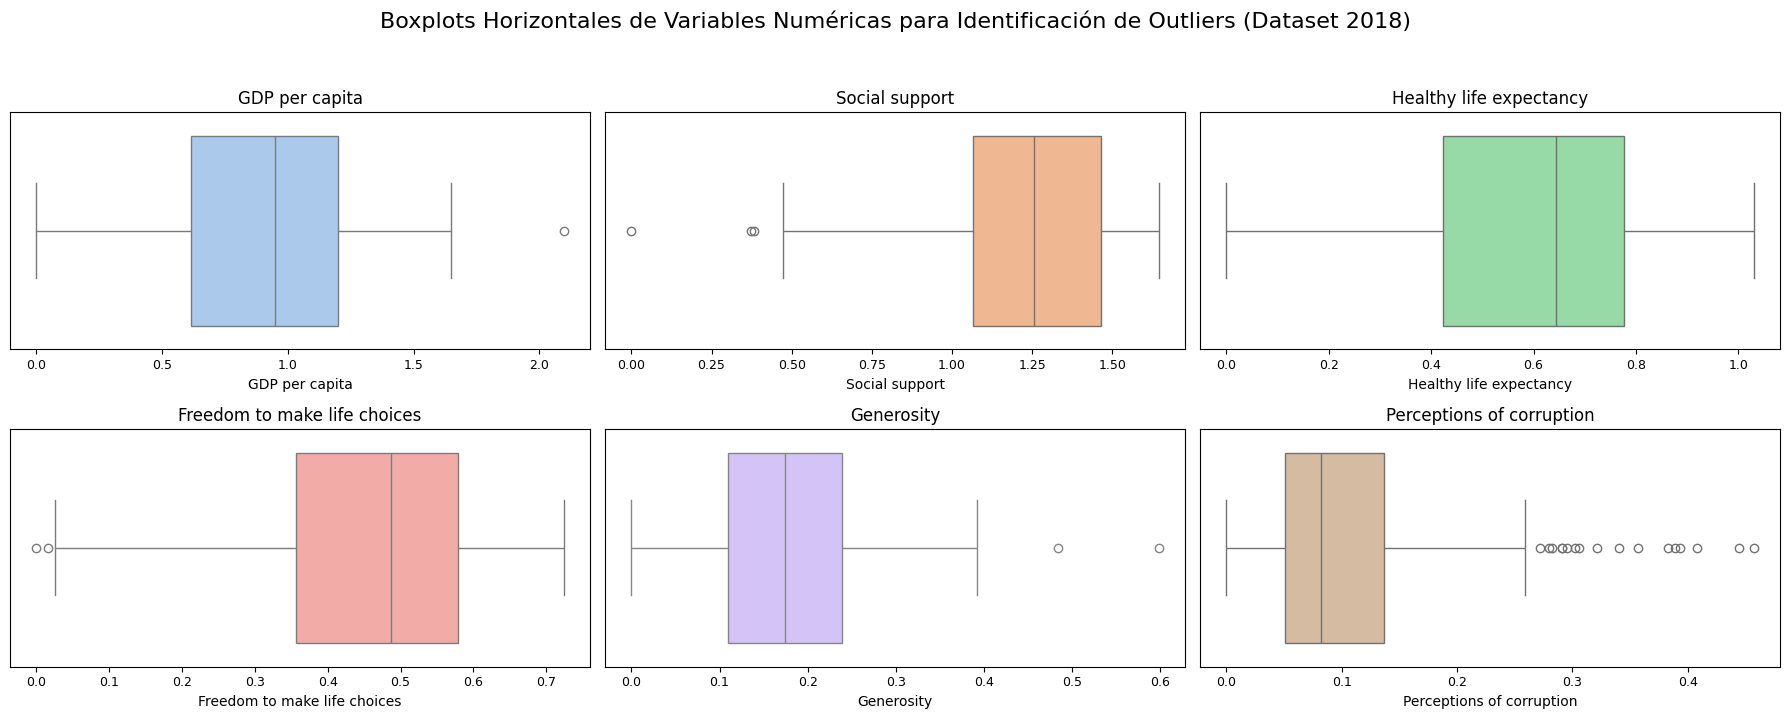

2025-05-21 23:25:45,157 - INFO - Boxplots horizontales generales generados y mostrados para df_2018.


In [12]:
# --- Boxplots Horizontales para Identificación de Outliers Generales (df_2018) ---
if 'df_2018' in locals() and df_2018 is not None:
    logging.info("Generando boxplots horizontales para identificar outliers generales en variables numéricas de df_2018.")

    actual_cols_for_hist_2018 = [col for col in cols_for_hist_2018 if col !='Score']

    if not actual_cols_for_hist_2018:
        logging.warning("No hay columnas seleccionadas para generar boxplots generales para df_2018.")
        print("\nNo hay columnas seleccionadas para generar boxplots generales para df_2018.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist_2018) + n_cols_plot - 1) // n_cols_plot

        plt.figure(figsize=(18, n_rows_plot * 3.5))
        plt.suptitle('Boxplots Horizontales de Variables Numéricas para Identificación de Outliers (Dataset 2018)', fontsize=16, y=1.02)

        for i, col in enumerate(actual_cols_for_hist_2018):
            plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            # La columna 'Perceptions of corruption' puede tener NaNs, boxplot los ignora por defecto.
            sns.boxplot(x=df_2018[col].dropna(), color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], orient='h')
            plt.title(col, fontsize=12)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('')
            plt.xticks(fontsize=9)
            plt.yticks([])

        for j in range(len(actual_cols_for_hist_2018), n_rows_plot * n_cols_plot):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Boxplots horizontales generales generados y mostrados para df_2018.")
else:
    logging.error("El DataFrame df_2018 no está cargado. Por favor, ejecuta la celda de carga primero.")

In [13]:
# Mostrar los valores de los cuartiles de 'Perceptions of corruption' en df_2018
if 'df_2018' in locals() and df_2018 is not None:
    quartiles = df_2018['Perceptions of corruption'].quantile([0.25, 0.5, 0.75])
    print("Cuartiles de 'Perceptions of corruption':")
    print(quartiles.to_markdown())
else:
    print("El DataFrame df_2018 no está cargado.")

Cuartiles de 'Perceptions of corruption':
|      |   Perceptions of corruption |
|-----:|----------------------------:|
| 0.25 |                       0.051 |
| 0.5  |                       0.082 |
| 0.75 |                       0.137 |


In [14]:
# Mostrar la mediana y la media de 'Perceptions of corruption' en df_2018
if 'df_2018' in locals() and df_2018 is not None:
    media_pc = df_2018['Perceptions of corruption'].mean()
    mediana_pc = df_2018['Perceptions of corruption'].median()
    print(f"Media de 'Perceptions of corruption': {media_pc:.3f}")
    print(f"Mediana de 'Perceptions of corruption': {mediana_pc:.3f}")
else:
    print("El DataFrame df_2018 no está cargado.")

Media de 'Perceptions of corruption': 0.112
Mediana de 'Perceptions of corruption': 0.082


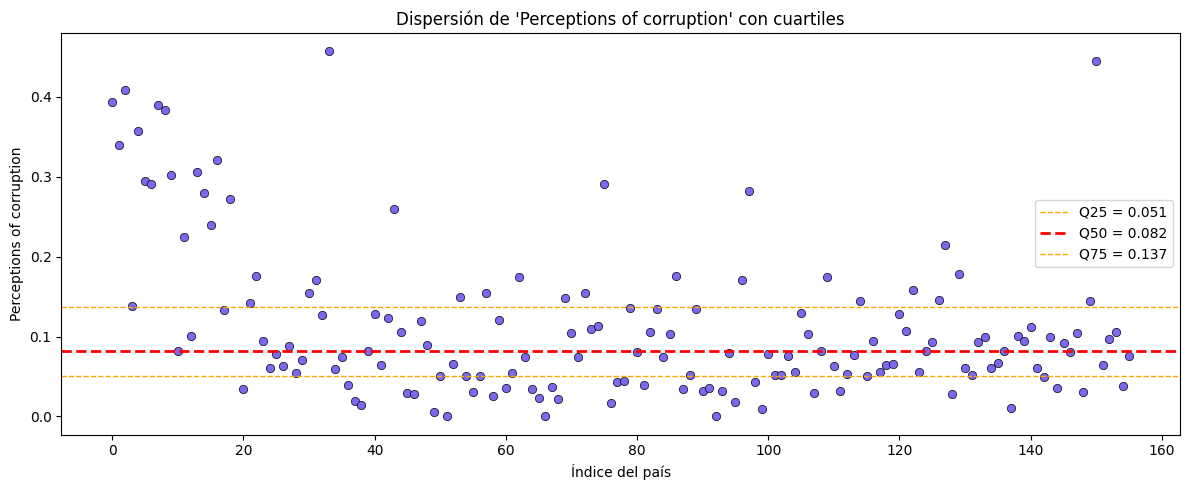

In [15]:
# --- Gráfica de dispersión de 'Perceptions of corruption' con líneas de cuartiles ---
if 'df_2018' in locals() and df_2018 is not None:
    plt.figure(figsize=(12, 5))
    sns.scatterplot(
        x=range(len(df_2018)),
        y=df_2018['Perceptions of corruption'],
        color='mediumslateblue',
        edgecolor='k'
    )
    # Líneas de cuartiles
    for q, val in quartiles.items():
        plt.axhline(y=val, color='red' if q == 0.5 else 'orange', linestyle='--', linewidth=2 if q == 0.5 else 1, label=f'Q{int(q*100)} = {val:.3f}')
    plt.title("Dispersión de 'Perceptions of corruption' con cuartiles")
    plt.xlabel('Índice del país')
    plt.ylabel('Perceptions of corruption')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame df_2018 no está cargado.")